In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pandas as pd
import itertools

In [2]:
# load the trajectory files
trr_file = './adp_450.trr'
gro_file = './adp.gro'
traj = md.load(trr_file, top=gro_file)

In [3]:
# check the trajectory
print(traj)

<mdtraj.Trajectory with 5001 frames, 22 atoms, 3 residues, and unitcells>


In [4]:
# shape of trajtime
print(traj.time.shape)

(5001,)


In [5]:
# compute phi and psi angles
phi = md.compute_phi(traj, periodic=True)
psi = md.compute_psi(traj, periodic=True)

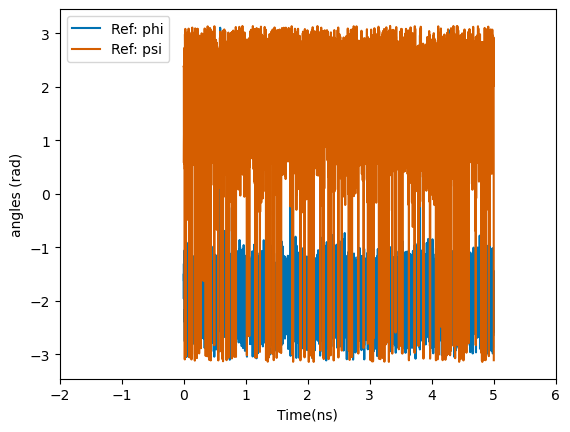

In [6]:
# plot phi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, phi[1][:,0], color='#0072B2')
# plot psi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, psi[1][:,0], color='#D55E00')
plt.xlabel('Time(ns)')
plt.xlim(-2, 6)
plt.ylabel('angles (rad)')
plt.legend(['Ref: phi', 'Ref: psi'])

-3.1122379302978516
3.1077373027801514


/state/partition1/job-25910484/ipykernel_3320816/1373709744.py:6: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


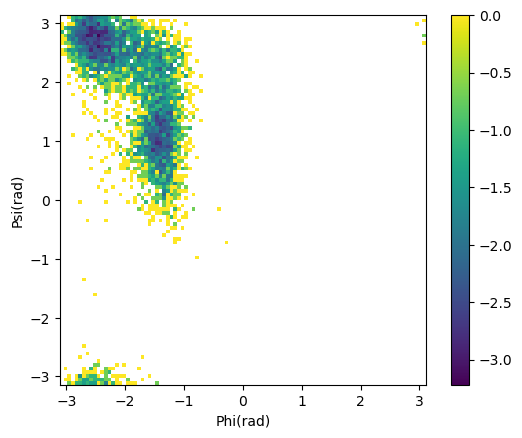

In [7]:
# compute a 2D histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi[1].flatten(), psi[1].flatten(), bins = 100)
print(xedges[0])
print(xedges[-1])
H = np.transpose(H)
H = -np.log(H)
plt.imshow(H, interpolation = 'nearest', origin = 'lower', extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi(rad)')
plt.ylabel('Psi(rad)')
plt.colorbar()